In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/ernesto-gym


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tqdm.rich import tqdm
from pathlib import Path
from rich.pretty import pprint

from ernestogym.envs import MicroGridEnv
from ernestogym.envs.single_agent.utils import parameter_generator
from stable_baselines3 import PPO

sns.set_style('darkgrid')
plot_colors = sns.color_palette(n_colors=30)
sns.set(font_scale=1.5)

In [3]:
len(plot_colors)

30

In [4]:
exp_name = '2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market'
folder = "./logs/{}/models/".format(exp_name)
alg_prefix = 'ppo'

In [5]:
result_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(alg_prefix)]

In [6]:
result_files

['ppo_2100000_steps.zip',
 'ppo_4200000_steps.zip',
 'ppo_5600000_steps.zip',
 'ppo_3500000_steps.zip',
 'ppo_13300000_steps.zip',
 'ppo_12600000_steps.zip',
 'ppo_2800000_steps.zip',
 'ppo_14000000_steps.zip',
 'ppo_4900000_steps.zip',
 'ppo_9100000_steps.zip',
 'ppo_8400000_steps.zip',
 'ppo_11900000_steps.zip',
 'ppo_700000_steps.zip',
 'ppo_9800000_steps.zip',
 'ppo_10500000_steps.zip',
 'ppo_final.zip',
 'ppo_1400000_steps.zip',
 'ppo_7000000_steps.zip',
 'ppo_11200000_steps.zip',
 'ppo_7700000_steps.zip',
 'ppo_6300000_steps.zip']

In [7]:
models = {file.split('.')[0]: folder + file for file in result_files}

In [8]:
models

{'ppo_2100000_steps': './logs/2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market/models/ppo_2100000_steps.zip',
 'ppo_4200000_steps': './logs/2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market/models/ppo_4200000_steps.zip',
 'ppo_5600000_steps': './logs/2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market/models/ppo_5600000_steps.zip',
 'ppo_3500000_steps': './logs/2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market/models/ppo_3500000_steps.zip',
 'ppo_13300000_steps': './logs/2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market/models/ppo_13300000_steps.zip',
 'ppo_12600000_steps': './logs/2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market/models/ppo_12600000_steps.zip',
 'ppo_2800000_steps': './logs/2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market/models/ppo_2800000_steps.zip',
 'ppo_14000000_steps': './logs/2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new_market/models/ppo_14000000_steps.zip',
 'ppo_4900000_steps': './logs/2015

In [50]:
pack_options = "ernestogym/ernesto/data/battery/pack.yaml"
# ecm = "ernestogym/ernesto/data/battery/models/electrical/thevenin_pack.yaml"
ecm = "ernestogym/ernesto/data/battery/models/electrical/thevenin_pack.yaml"
r2c = "ernestogym/ernesto/data/battery/models/thermal/r2c_thermal_pack.yaml"
bolun = "ernestogym/ernesto/data/battery/models/aging/bolun_pack.yaml"
world = "ernestogym/envs/single_agent/ijcnn_deg_test.yaml"
#world = "ernestogym/envs/single_agent/ijcnn_test.yaml"

weights = {"trading_coeff": 1, "operational_cost_coeff": 0, "degradation_coeff": 1, "clip_action_coeff": 0.1}

params = parameter_generator(
    battery_options=pack_options,
    electrical_model=ecm,
    thermal_model=r2c,
    aging_model=bolun,
    world_options=world,
    reward_coeff=weights
)

test_profiles = list(range(370,398))
comparison_dict = {}        

In [53]:
for label, file in models.items():

    comparison_dict[label] = {}
    
    for profile in test_profiles:
        # Create environment
        env = MicroGridEnv(settings=params)
    
        res_dict = {
                'timestamps': env.generation._timestamps,
                'pure_reward': {},
                'norm_reward': {},
                'weighted_reward': {},
                'total_reward': 0
        }
        
        model = PPO.load(file, env=env)
        
        actions = [] 
        #vec_env = model.get_env()
        #vec_env.set_options({'eval_profile': str(test_profile)})
        #obs = vec_env.reset()
        
        obs, info = env.reset(options={'eval_profile': str(test_profile)})
    
        for _ in tqdm(range(len(env.generation))):
            action, _states = model.predict(obs)
            #actions.append(action)
            obs, rewards, terminated, truncated, info = env.step(action)
            
        res_dict['total_reward'] = env.total_reward
        res_dict['pure_reward'] = env.pure_reward_list
        res_dict['norm_reward'] = env.norm_reward_list
        res_dict['weighted_reward'] = env.weighted_reward_list
        
        comparison_dict[label][profile] = res_dict

Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


Output()

Resetting the environment...
profile:  370


In [54]:
comparison_dict.keys()

dict_keys(['ppo_2100000_steps', 'ppo_4200000_steps', 'ppo_5600000_steps', 'ppo_3500000_steps', 'ppo_13300000_steps', 'ppo_12600000_steps', 'ppo_2800000_steps', 'ppo_14000000_steps', 'ppo_4900000_steps', 'ppo_9100000_steps', 'ppo_8400000_steps', 'ppo_11900000_steps', 'ppo_700000_steps', 'ppo_9800000_steps', 'ppo_10500000_steps', 'ppo_final', 'ppo_1400000_steps', 'ppo_7000000_steps', 'ppo_11200000_steps', 'ppo_7700000_steps', 'ppo_6300000_steps'])

In [55]:
def cum_reward_comparison(sampling_rate=1, reward_type='weighted_reward', test_profile=370):
    fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

    for i, item in enumerate(comparison_dict.items()):
        key, values = item
        
        timestamps = values[test_profile]['timestamps']
        
        if reward_type == 'weighted_reward':
            cum_reward = np.cumsum(np.sum([values[test_profile][reward_type]['r_trad'], 
                                           [v for v in values[test_profile][reward_type]['r_deg']], 
                                           [v for v in values[test_profile][reward_type]['r_clip']]], 
                                          axis=0))
        else:
            cum_reward = np.cumsum(np.sum([values[test_profile][reward_type]['r_trad'], 
                                           [values[test_profile][reward_type]['r_deg'], 
                                           values[test_profile][reward_type]['r_clip']], 
                                          axis=0))
            
        ax.plot(timestamps[::sampling_rate], cum_reward[::sampling_rate], label=key, color=plot_colors[i])
        ax.set(xlabel='Time', ylabel='Cumulative Reward', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
    ax.legend()
    
def single_policy_cum_reward_terms_comparison(sampling_rate=50, policy='ppo'):
    fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, figsize=(9, 12), tight_layout=True, sharex=True)
    
    key, values = policy, comparison_dict['actual_reward'][policy]
    i = 0
        
    ax1.plot(timestamps[::sampling_rate], np.cumsum([r[0] for r in values])[::sampling_rate], label=key, color=plot_colors[i])
    ax1.set(xlabel='Time', ylabel='Trading Reward', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 

    ax2.plot(timestamps[::sampling_rate], np.cumsum([r[1] for r in values])[::sampling_rate], label=key, color=plot_colors[i])
    ax2.set(xlabel='Time', ylabel='Operational Cost Penalty', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 

    ax3.plot(timestamps[::sampling_rate], np.cumsum([r[2] for r in values])[::sampling_rate], label=key, color=plot_colors[i])
    ax3.set(xlabel='Time', ylabel='Degradation Penalty', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 

    ax4.plot(timestamps[::sampling_rate], np.cumsum([r[3] for r in values])[::sampling_rate], label=key, color=plot_colors[i])
    ax4.set(xlabel='Time', ylabel='Action Clipping Penalty', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 

    
def single_policy_plot_rewards_terms(rewards: list, policy='ppo'):
    nrows = 4
    ncols = 1
    labels = ['Trading', 'Operational Cost', 'Degradation', 'Action_clipping']
    
    values = rewards[policy]
    
    fig, ax = plt.subplots(nrows, ncols, figsize=(8, 12), tight_layout=True, sharex=True)
    
    for j in range(nrows):
        ax[j].plot(timestamps, np.array(values)[:, j], label='{} Reward'.format(labels[j]), color=plot_colors[j])
        ax[j].set(xlabel='Time', ylabel='{} Reward'.format(labels[j]), 
                  xticks=[timestamps[0], timestamps[len(timestamps)//2],timestamps[-1]])
        #ax[j].legend()
        
def average_cumulative_reward(rewards: list, policy='ppo'):
    fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True, sharey=True)
    
    test_profiles = list(range(370, 398))
    
    ax.plot(df_mean[idx].index, df_mean[idx][col], label='Winter', color='tab:blue')
    ax.fill_between(df_mean[idx].index, df_mean[idx][col] - df_std[idx][col], df_mean[idx][col] + df_std[idx][col], color='tab:blue', alpha=0.5)

    idx = 1
    ax.plot(df_mean[idx].index, df_mean[idx][col], label='Summer', color='tab:orange')
    ax.fill_between(df_mean[idx].index, df_mean[idx][col] - df_std[idx][col], df_mean[idx][col] + df_std[idx][col], color='tab:orange', alpha=0.5)

    ax.set(xlabel='Day Hours', ylabel='Average Demand (kWh)', xticks=df_mean[idx].index[::3])
    ax.legend()


/Users/dave/miniconda3/envs/ernesto-gym/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


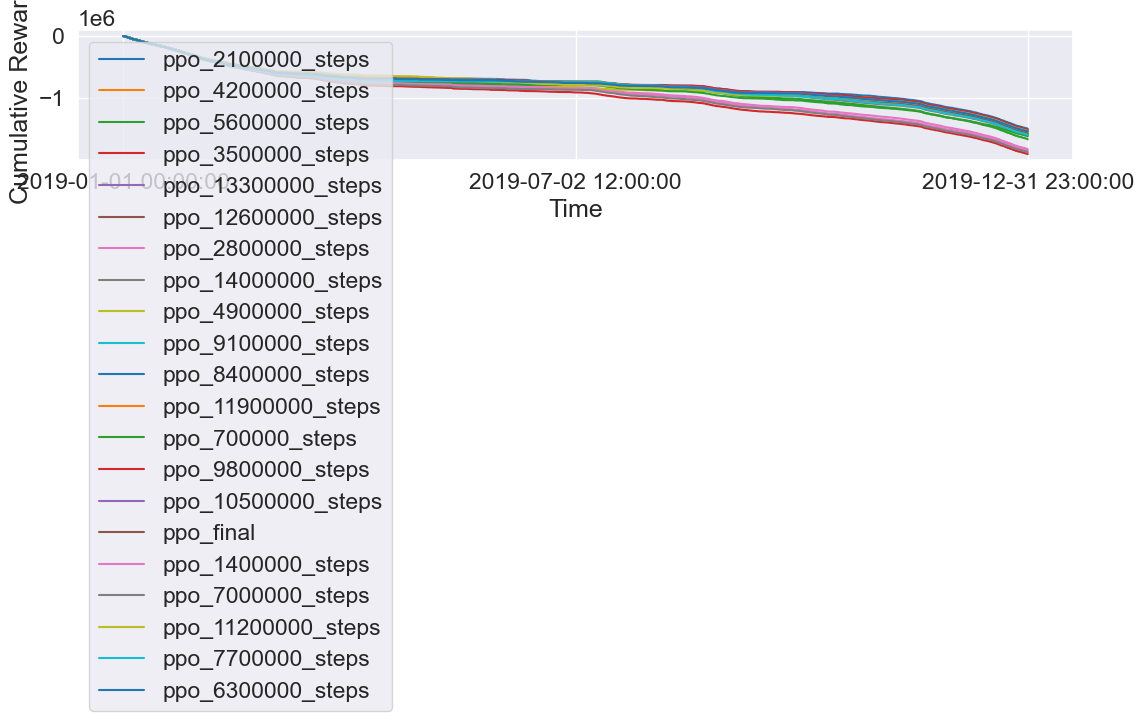

In [56]:
cum_reward_comparison(reward_type='pure_reward')

In [68]:
def objective_function(reward_type='pure_reward'):
    returns = {}
    
    for i, item in enumerate(comparison_dict.items()):
        key, values = item
        trad_mean = np.mean([np.sum(values[j][reward_type]['r_trad']) for j in test_profiles])
        deg_mean = np.mean([np.sum(values[j][reward_type]['r_deg']) for j in test_profiles])
        mean_return = trad_mean + deg_mean
        returns[key] = mean_return

    print({key:value for key, value in returns.items() if value == max(returns.values())})
    
    pprint(dict(sorted(returns.items(), key=lambda item: item[1])))

In [69]:
objective_function()

{'ppo_5600000_steps': -432.63195755049145}


{
│   'ppo_4900000_steps': -451.3238805042416,
│   'ppo_700000_steps': -446.94743769465833,
│   'ppo_4200000_steps': -442.73719807896555,
│   'ppo_6300000_steps': -442.51351723943134,
│   'ppo_2100000_steps': -442.2065305719731,
│   'ppo_8400000_steps': -441.4887097904077,
│   'ppo_9100000_steps': -440.97866944992654,
│   'ppo_11200000_steps': -440.49780595451796,
│   'ppo_7000000_steps': -440.37015952236106,
│   'ppo_3500000_steps': -439.6053774558477,
│   'ppo_9800000_steps': -439.51372752896964,
│   'ppo_12600000_steps': -439.039870822172,
│   'ppo_10500000_steps': -438.9547794817356,
│   'ppo_1400000_steps': -438.81857300486445,
│   'ppo_13300000_steps': -436.4037458598756,
│   'ppo_final': -435.8031662418107,
│   'ppo_14000000_steps': -435.5018888657986,
│   'ppo_7700000_steps': -435.20871730011487,
│   'ppo_2800000_steps': -434.10396290013483,
│   'ppo_11900000_steps': -433.94905683599313,
│   'ppo_5600000_steps': -432.63195755049145
}

In [17]:
def cum_average_reward_terms_comparison(sampling_rate=10, reward_type='weighted_reward'):
    fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(12, 12), tight_layout=True, sharex=True)
    
    for i, item in enumerate(comparison_dict.items()):
        key, values = item
        
        timestamps = values[test_profile]['timestamps']
        
        ax1.plot(timestamps[::sampling_rate], np.cumsum(values[test_profile][reward_type]['r_trad'])[::sampling_rate], label=key, color=plot_colors[i])
        ax1.set(xlabel='Time', ylabel='Trading Reward', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
          
        ax2.plot(timestamps[::sampling_rate], np.cumsum(values[test_profile][reward_type]['r_op'])[::sampling_rate], label=key, color=plot_colors[i])
        ax2.set(xlabel='Time', ylabel='Operational Cost Penalty', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
            
        ax3.plot(timestamps[::sampling_rate], np.cumsum(values[test_profile][reward_type]['r_clip'])[::sampling_rate], label=key, color=plot_colors[i])
        ax3.set(xlabel='Time', ylabel='Action Clipping Penalty', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
        
    plt.legend()   

In [ ]:
cum_average_reward_terms_comparison(reward_type='norm_reward')

In [ ]:
single_policy_plot_rewards_terms(rewards=comparison_dict['weighted_reward'], policy='ppo_new_norm_energy_weights_1000000_steps')